# Stocks Price Prediction With LSTM

In [59]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense

In [2]:
plt.style.use("fivethirtyeight")
%matplotlib inline

In [3]:
stock = "POWERGRID.NS"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2025, 8, 26)
df = yf.download(stock, start, end)

/tmp/ipykernel_6253/676154855.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2007-10-05,32.246143,35.098934,26.652751,28.784331,855215656
2007-10-08,30.595390,33.335993,30.403066,33.335993,126671715
2007-10-09,32.678883,32.967366,28.960638,30.611409,116725709
2007-10-10,32.983387,33.656518,32.694903,33.528301,67931378
2007-10-11,36.669586,38.464601,32.694912,38.464601,106320954


In [5]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2025-08-19,288.000000,290.100006,286.549988,290.000000,7196772
2025-08-20,288.399994,289.000000,286.950012,288.200012,3106073
2025-08-21,284.000000,289.549988,283.600006,288.399994,7389271
2025-08-22,283.350006,284.549988,281.799988,284.000000,6824793
2025-08-25,284.149994,284.600006,282.200012,283.350006,7426789


In [6]:
df.shape

(4410, 5)

In [7]:
df.isnull().sum()

Price   Ticker      
Close   POWERGRID.NS    0
High    POWERGRID.NS    0
Low     POWERGRID.NS    0
Open    POWERGRID.NS    0
Volume  POWERGRID.NS    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4410 entries, 2007-10-05 to 2025-08-25
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4410 non-null   float64
 1   (High, POWERGRID.NS)    4410 non-null   float64
 2   (Low, POWERGRID.NS)     4410 non-null   float64
 3   (Open, POWERGRID.NS)    4410 non-null   float64
 4   (Volume, POWERGRID.NS)  4410 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 206.7 KB


In [9]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4410.000000,4410.000000,4410.000000,4410.000000,4.410000e+03
mean,88.773294,89.910392,87.653905,88.814441,1.192109e+07
std,76.605944,77.489116,75.698593,76.603952,2.018606e+07
min,18.827005,20.125419,16.879385,20.028038,0.000000e+00
25%,36.533523,37.079246,36.024957,36.580624,4.923597e+06
50%,66.064491,67.042120,65.232700,66.055710,8.525476e+06
75%,97.373301,99.375555,95.972291,97.651233,1.376872e+07
max,354.580750,355.356950,346.576122,353.222365,8.552157e+08


In [10]:
df = df.reset_index()


In [11]:
df.shape

(4410, 6)

In [12]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,2007-10-05,32.246143,35.098934,26.652751,28.784331,855215656
1,2007-10-08,30.595390,33.335993,30.403066,33.335993,126671715
2,2007-10-09,32.678883,32.967366,28.960638,30.611409,116725709
3,2007-10-10,32.983387,33.656518,32.694903,33.528301,67931378
4,2007-10-11,36.669586,38.464601,32.694912,38.464601,106320954


In [13]:
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [14]:
df.to_csv("../datasets/powergrid.csv")

In [15]:
data = pd.read_csv("../datasets/powergrid.csv")
data.sample(10)

,Price,Date,Close,High,Low,Open,Volume
1187,1186,2012-07-26,38.20313262939453,38.45952943044006,37.67324544355322,37.929642244598746,10181302
728,727,2010-09-21,35.20188903808594,35.65170100884707,35.08527045022572,35.50176217885186,4168036
2748,2747,2018-12-03,72.12816619873047,73.97257155289074,71.0686102231005,71.0686102231005,11107638
1955,1954,2015-09-10,45.51703643798828,46.03364537292963,44.539168631674485,46.03364537292963,3984541
2656,2655,2018-07-16,70.14847564697266,70.59330904866603,69.8583662224142,70.03243397574175,12191173
525,524,2009-11-26,33.88614273071289,34.412019628536946,33.721806478762005,34.149081179624915,5780245
4398,4397,2025-08-06,283.5738830566406,287.15839061828996,282.8271119140552,286.3618468873437,12985269
3533,3532,2022-02-04,131.66204833984375,133.95373661273112,131.28533543409574,133.10612938134156,7329263
2004,2003,2015-11-27,49.26245880126953,49.44696235479504,48.89345169421851,49.31781387131055,1605635
3035,3034,2020-02-04,79.56390380859375,79.95282134602553,76.96431084648458,77.10759654725594,14207381


In [16]:
data.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05,32.24614334106445,35.098934008723525,26.65275122101279,28.7843310945574,855215656
2,1,2007-10-08,30.59539031982422,33.33599333821832,30.403066461983048,33.33599333821832,126671715
3,2,2007-10-09,32.67888259887695,32.96736615216298,28.960638057695306,30.61140916310034,116725709
4,3,2007-10-10,32.9833869934082,33.656518050021006,32.694903497024825,33.528301472014974,67931378


In [17]:
data.shape

(4411, 7)

In [18]:
# plotly plots
fig = go.Figure(
        data = [go.Candlestick(x=data["Date"],
        open = data["Open"],
        high = data["High"],
        low = data["Low"],
        close = data["Close"]
    )]
)
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [19]:
data.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05,32.24614334106445,35.098934008723525,26.65275122101279,28.7843310945574,855215656
2,1,2007-10-08,30.59539031982422,33.33599333821832,30.403066461983048,33.33599333821832,126671715
3,2,2007-10-09,32.67888259887695,32.96736615216298,28.960638057695306,30.61140916310034,116725709
4,3,2007-10-10,32.9833869934082,33.656518050021006,32.694903497024825,33.528301472014974,67931378


In [20]:
data = data.drop("Date", axis=1)

In [21]:
data.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,32.24614334106445,35.098934008723525,26.65275122101279,28.7843310945574,855215656
2,1,30.59539031982422,33.33599333821832,30.403066461983048,33.33599333821832,126671715
3,2,32.67888259887695,32.96736615216298,28.960638057695306,30.61140916310034,116725709
4,3,32.9833869934082,33.656518050021006,32.694903497024825,33.528301472014974,67931378


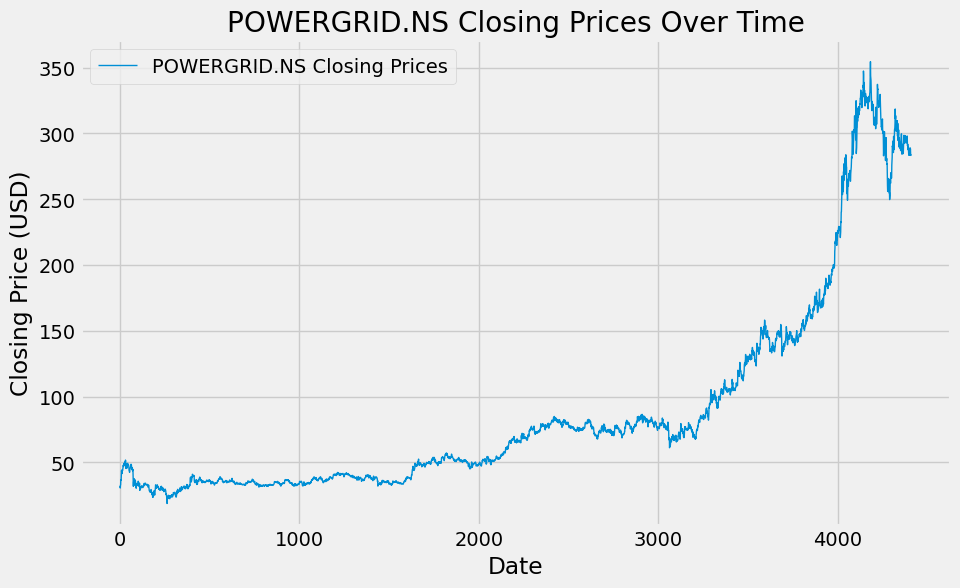

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(
    df["Close"],
    label = f"{stock} Closing Prices",
    linewidth = 1
)
plt.title(f"{stock} Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.show()

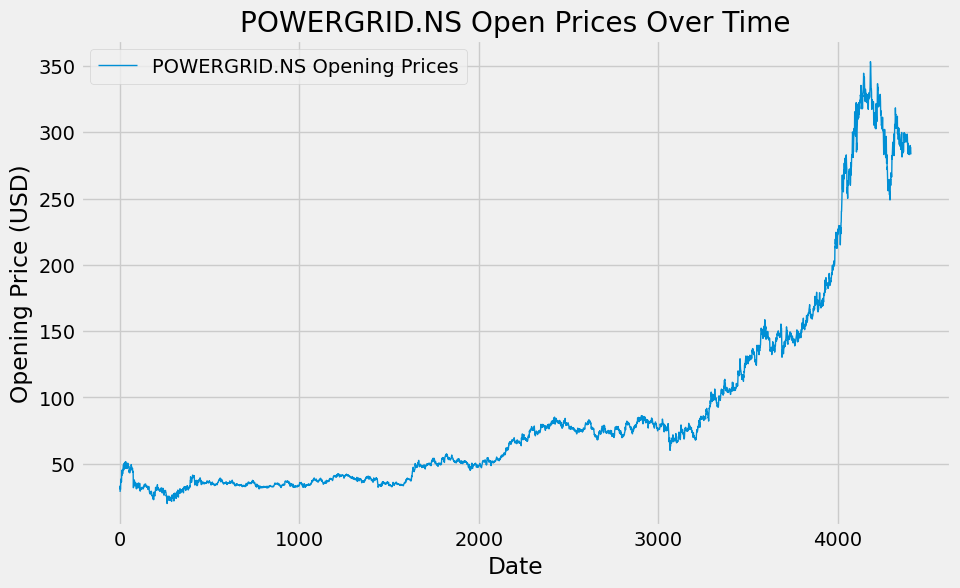

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(
    df["Open"],
    label = f"{stock} Opening Prices",
    linewidth = 1
)
plt.title(f"{stock} Open Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Opening Price (USD)")
plt.legend()
plt.show()

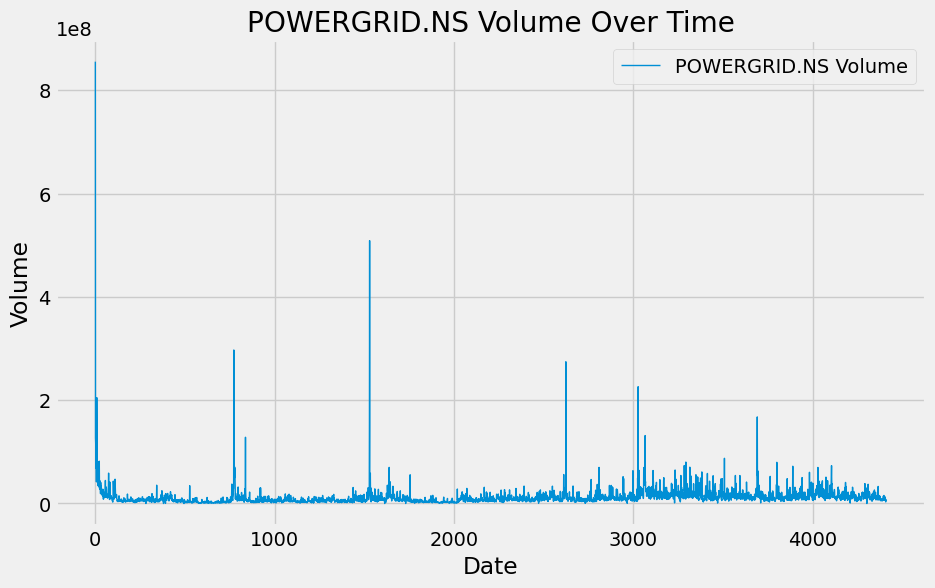

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(
    df["Volume"],
    label = f"{stock} Volume",
    linewidth = 1
)
plt.title(f"{stock} Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()

In [25]:
data.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,32.24614334106445,35.098934008723525,26.65275122101279,28.7843310945574,855215656
2,1,30.59539031982422,33.33599333821832,30.403066461983048,33.33599333821832,126671715
3,2,32.67888259887695,32.96736615216298,28.960638057695306,30.61140916310034,116725709
4,3,32.9833869934082,33.656518050021006,32.694903497024825,33.528301472014974,67931378


In [26]:
data = data.drop(0)
data.head()

,Price,Close,High,Low,Open,Volume
1,0,32.24614334106445,35.098934008723525,26.65275122101279,28.7843310945574,855215656
2,1,30.59539031982422,33.33599333821832,30.403066461983048,33.33599333821832,126671715
3,2,32.67888259887695,32.96736615216298,28.960638057695306,30.61140916310034,116725709
4,3,32.9833869934082,33.656518050021006,32.694903497024825,33.528301472014974,67931378
5,4,36.669586181640625,38.464601376275176,32.69491247410747,38.464601376275176,106320954


In [27]:
data = data.drop("Price", axis=1)
data.head()

,Close,High,Low,Open,Volume
1,32.24614334106445,35.098934008723525,26.65275122101279,28.7843310945574,855215656
2,30.59539031982422,33.33599333821832,30.403066461983048,33.33599333821832,126671715
3,32.67888259887695,32.96736615216298,28.960638057695306,30.61140916310034,116725709
4,32.9833869934082,33.656518050021006,32.694903497024825,33.528301472014974,67931378
5,36.669586181640625,38.464601376275176,32.69491247410747,38.464601376275176,106320954


In [28]:
data.shape

(4410, 5)

In [29]:
data.shape

(4410, 5)

In [30]:
data.tail()

,Close,High,Low,Open,Volume
4406,288.0,290.1000061035156,286.54998779296875,290.0,7196772
4407,288.3999938964844,289.0,286.95001220703125,288.20001220703125,3106073
4408,284.0,289.54998779296875,283.6000061035156,288.3999938964844,7389271
4409,283.3500061035156,284.54998779296875,281.79998779296875,284.0,6824793
4410,284.1499938964844,284.6000061035156,282.20001220703125,283.3500061035156,7426789


In [31]:
# moving average 100
ma100 = data.Close.rolling(100).mean()
ma100

1              NaN
2              NaN
3              NaN
4              NaN
5              NaN
           ...    
4406    294.718167
4407    294.704695
4408    294.648716
4409    294.539938
4410    294.490438
Name: Close, Length: 4410, dtype: float64

In [32]:
# moving average 200
ma200 = data.Close.rolling(200).mean()
ma200

1              NaN
2              NaN
3              NaN
4              NaN
5              NaN
           ...    
4406    294.486719
4407    294.383826
4408    294.247533
4409    294.101925
4410    293.992336
Name: Close, Length: 4410, dtype: float64

In [33]:
data["Close"]

1        32.24614334106445
2        30.59539031982422
3        32.67888259887695
4         32.9833869934082
5       36.669586181640625
               ...        
4406                 288.0
4407     288.3999938964844
4408                 284.0
4409     283.3500061035156
4410     284.1499938964844
Name: Close, Length: 4410, dtype: object

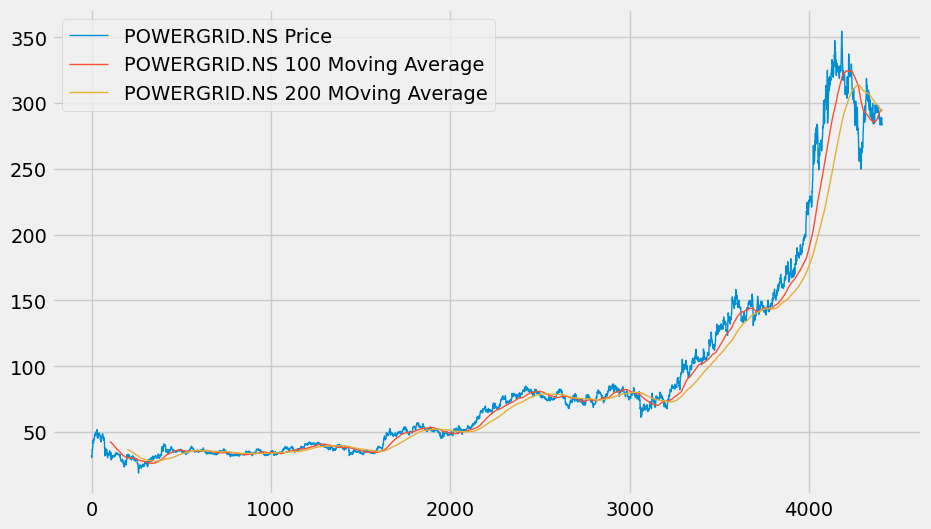

In [34]:
# plotting the 100 and 200 moving averages
plt.figure(figsize=(10, 6))
plt.plot(
    df.Close,
    label = f"{stock} Price",
    linewidth = 1
)
plt.plot(
    ma100,
    label = f"{stock} 100 Moving Average",
    linewidth = 1
)
plt.plot(
    ma200,
    label = f"{stock} 200 MOving Average",
    linewidth = 1
)
plt.legend()
plt.show()

In [35]:
data["Close"].isnull().sum()

np.int64(0)

In [36]:
# exponential moving average 100
ema100 = data.Close.ewm(span=100, adjust=False).mean()
ema100

1        32.246143
2        32.213455
3        32.222672
4        32.237735
5        32.325495
           ...    
4406    291.953657
4407    291.883288
4408    291.727183
4409    291.561298
4410    291.414540
Name: Close, Length: 4410, dtype: float64

In [37]:
# exponential moving average 200
ema200 = data.Close.ewm(span=200, adjust=False).mean()
ema200

1        32.246143
2        32.229718
3        32.234187
4        32.241642
5        32.285701
           ...    
4406    292.445629
4407    292.405374
4408    292.321738
4409    292.232467
4410    292.152045
Name: Close, Length: 4410, dtype: float64

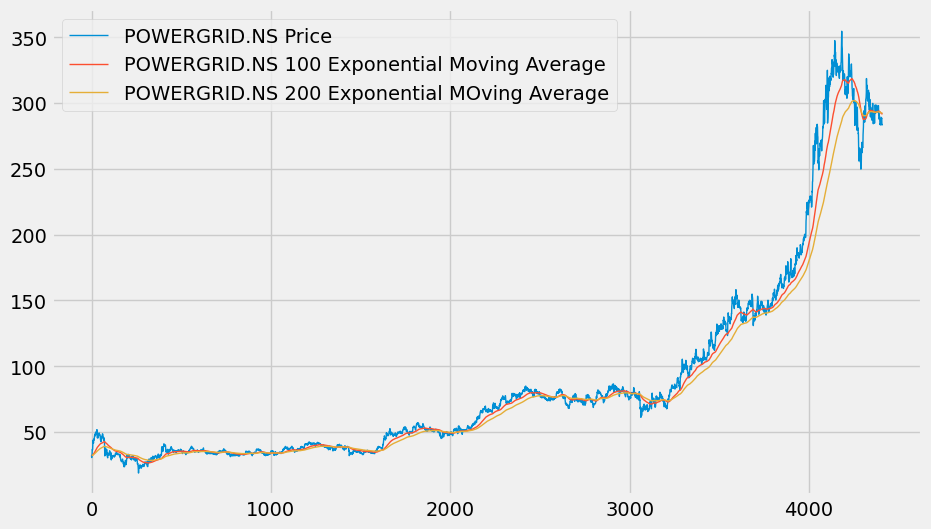

In [38]:
# plotting the 100 and 200 exponential moving averages
plt.figure(figsize=(10, 6))
plt.plot(
    df.Close,
    label = f"{stock} Price",
    linewidth = 1
)
plt.plot(
    ema100,
    label = f"{stock} 100 Exponential Moving Average",
    linewidth = 1
)
plt.plot(
    ema200,
    label = f"{stock} 200 Exponential MOving Average",
    linewidth = 1
)
plt.legend()
plt.show()

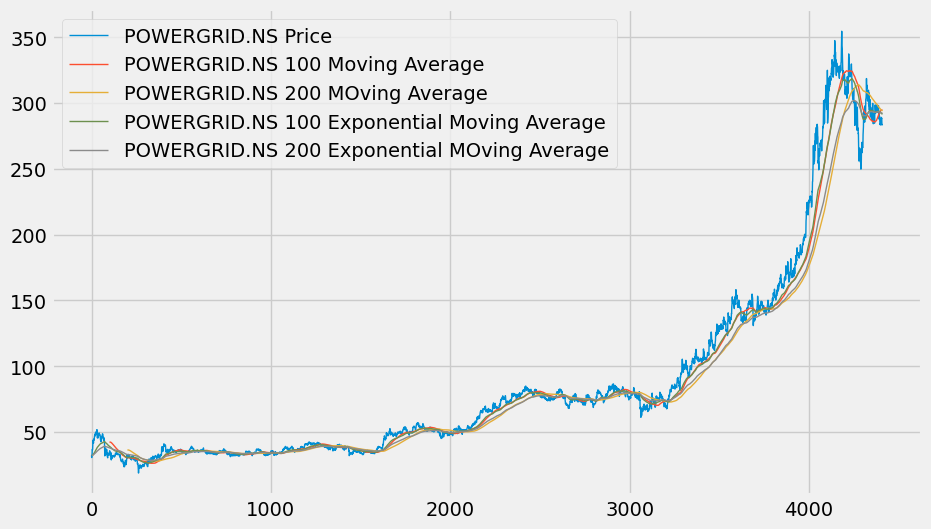

In [39]:
# plotting the 100 and 200 moving averages and the 100 and 200 exponential moving averages
plt.figure(figsize=(10, 6))
plt.plot(
    df.Close,
    label = f"{stock} Price",
    linewidth = 1
)
plt.plot(
    ma100,
    label = f"{stock} 100 Moving Average",
    linewidth = 1
)
plt.plot(
    ma200,
    label = f"{stock} 200 MOving Average",
    linewidth = 1
)
plt.plot(
    ema100,
    label = f"{stock} 100 Exponential Moving Average",
    linewidth = 1
)
plt.plot(
    ema200,
    label = f"{stock} 200 Exponential MOving Average",
    linewidth = 1
)
plt.legend()
plt.show()

In [40]:
df.head(10)

Price,Date,Close,High,Low,Open,Volume
Ticker,,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,2007-10-05,32.246143,35.098934,26.652751,28.784331,855215656
1,2007-10-08,30.595390,33.335993,30.403066,33.335993,126671715
2,2007-10-09,32.678883,32.967366,28.960638,30.611409,116725709
3,2007-10-10,32.983387,33.656518,32.694903,33.528301,67931378
4,2007-10-11,36.669586,38.464601,32.694912,38.464601,106320954
5,2007-10-12,36.429173,37.791460,35.579747,35.900285,99410791
6,2007-10-15,36.909988,37.406825,36.589450,37.182447,41814972
7,2007-10-16,40.676311,41.317392,36.701638,36.958067,138614496
8,2007-10-17,43.849632,44.875352,34.009107,36.541359,204876259


In [41]:
data.head(10)

,Close,High,Low,Open,Volume
1,32.24614334106445,35.098934008723525,26.65275122101279,28.7843310945574,855215656
2,30.59539031982422,33.33599333821832,30.403066461983048,33.33599333821832,126671715
3,32.67888259887695,32.96736615216298,28.960638057695306,30.61140916310034,116725709
4,32.9833869934082,33.656518050021006,32.694903497024825,33.528301472014974,67931378
5,36.669586181640625,38.464601376275176,32.69491247410747,38.464601376275176,106320954
6,36.42917251586914,37.79145980080954,35.579747195951185,35.90028538064305,99410791
7,36.90998840332031,37.406825314041924,36.589450143852844,37.18244679338334,41814972
8,40.67631149291992,41.31739233643636,36.701638087618704,36.95806694696269,138614496
9,43.849632263183594,44.87535178234454,34.00910668767318,36.54135949472348,204876259
10,42.311058044433594,47.904452292138274,40.50001778649914,44.55482581295586,146617799


In [42]:
df.tail(10)

Price,Date,Close,High,Low,Open,Volume
Ticker,,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
4400,2025-08-11,283.623688,285.167003,282.080342,283.623688,8755499
4401,2025-08-12,283.424530,286.312039,282.777334,283.175606,13184438
4402,2025-08-13,286.959290,288.154105,284.818521,285.764443,9928283
4403,2025-08-14,287.457123,288.900862,285.913778,287.805592,8464495
4404,2025-08-18,289.100006,290.045898,287.257965,288.253659,9836105
4405,2025-08-19,288.000000,290.100006,286.549988,290.000000,7196772
4406,2025-08-20,288.399994,289.000000,286.950012,288.200012,3106073
4407,2025-08-21,284.000000,289.549988,283.600006,288.399994,7389271
4408,2025-08-22,283.350006,284.549988,281.799988,284.000000,6824793


In [43]:
data.tail(10)

,Close,High,Low,Open,Volume
4401,283.6236877441406,285.16700262699317,282.0803424750923,283.6236877441406,8755499
4402,283.4245300292969,286.31203898704456,282.77733446076303,283.17560631938426,13184438
4403,286.95928955078125,288.1541052291097,284.8185211529888,285.7644434862551,9928283
4404,287.4571228027344,288.9008621409508,285.9137775135009,287.80559170031324,8464495
4405,289.1000061035156,290.0458979803741,287.2579645516817,288.25365940281404,9836105
4406,288.0,290.1000061035156,286.54998779296875,290.0,7196772
4407,288.3999938964844,289.0,286.95001220703125,288.20001220703125,3106073
4408,284.0,289.54998779296875,283.6000061035156,288.3999938964844,7389271
4409,283.3500061035156,284.54998779296875,281.79998779296875,284.0,6824793
4410,284.1499938964844,284.6000061035156,282.20001220703125,283.3500061035156,7426789


In [44]:
# training and tesing splits
training =  pd.DataFrame(data["Close"][0:int(len(data)*0.8)])
testing = pd.DataFrame(data["Close"][int(len(data)*0.8):int(len(data))])


In [45]:
print(data.shape, training.shape, testing.shape)

(4410, 5) (3528, 1) (882, 1)


In [47]:
# scaling the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_training = scaler.fit_transform(training)

In [52]:
scaled_training.shape[0]

3528

In [54]:
X_train = []
y_train = []

for i in range(100, len(scaled_training)):
    X_train.append(scaled_training[i-100:i])
    y_train.append(scaled_training[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape, y_train.shape)

(3428, 100, 1) (3428,)


In [60]:
model = Sequential([
    Input(shape=(X_train.shape[1], 1)),

    LSTM(units=50, activation="relu", return_sequences=True),
    Dropout(0.2),

    LSTM(units=60, activation="relu", return_sequences=True),
    Dropout(0.3),

    LSTM(units=80, activation="relu", return_sequences=True),
    Dropout(0.4),

    LSTM(units=120, activation="relu", return_sequences=False),
    Dropout(0.5),

    Dense(units=1)
])


In [61]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)